# 13-9. 프로젝트: Face2Emoji 모바일 웹앱
* tensorflowjs가 브라우저에서 제대로 실행되지 않는 문제가 있어 오래 걸렸다.   
   
   
* 문제의 원인은 ```prompt-toolkit```의 버전 충돌인 것으로 보인다. jupyter notebook에서 요구하는 버전은 3.0.0 이상인 반면, pyinquirer에서 요구하는 버전은 1.0.14 여서 계속 오류가 발생했다. 결국 웹 서버를 띄우기 위한 아나콘다 가상 환경을 별도로 만들었다. jupyter notebook이나 ipython kernel 설치 없이 tensorflowjs만 설치했다. 학습은 기존 환경에서 시키고, 웹 서버 실행만 새로운 환경에서 했다. 기존에 계속 실행해보던 크롬 브라우저에 캐시가 남아서인지 에러가 계속돼, 파이어폭스 브라우저 (private mode) 에서 실행했더니 정상 작동했다. 파이어폭스에서 실행 시 Google Meet 등 현재 PC에서 웹캠을 실행 중인 프로그램을 모두 종료해야 했다.   
   
   
* 학습 시 batch_size를 128로 지정했다. 예시 답안에서 주어진 512로 했을 경우 ```val_categorical_accuracy``` 가 0.1대에 머물렀기 때문이다. 100 epoch 후 최종 ```val_categorical_accuracy```는 0.5166 이었다.   
   
   
* https://jonggu.github.io/face2emoji

## 필요한 모듈 import

In [1]:
import numpy as np
import tqdm
import os

import tensorflow as tf

from matplotlib import pyplot as plt

## 표정 데이터로 MobileNet 학습하기

In [2]:
train_x = []
train_y = []
eval_x = []
eval_y = []

csv_path = 'data/fer2013.csv'

with open(csv_path) as f:
    for line in tqdm.tqdm(f.read().splitlines()[1:]):
        emotion, pixels, usage = line.split(',')

        x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
        y = int(emotion)

        if usage == 'PrivateTest':
            eval_x.append(x)
            eval_y.append(y)
        else:
            train_x.append(x)
            train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:25<00:00, 1400.63it/s]

train : 32298, eval :3589


Angry


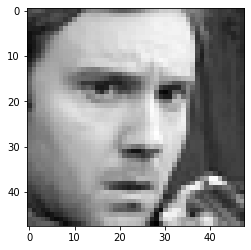

In [3]:
# 첫번째 데이터 확인
LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

In [4]:
# MobileNet 모델 학습하기

# model 선언 
model = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 1), weights=None, classes=7)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit
model.fit(np.stack(train_x),
          tf.keras.utils.to_categorical(train_y),
          epochs=100,
          batch_size=128,
          validation_data=(np.stack(eval_x),
                           tf.keras.utils.to_categorical(eval_y)))

Epoch 1/100
253/253 [==============================] - 51s 200ms/step - loss: 1.7891 - categorical_accuracy: 0.2634 - val_loss: 1.9185 - val_categorical_accuracy: 0.1744
Epoch 2/100
253/253 [==============================] - 8s 30ms/step - loss: 1.6125 - categorical_accuracy: 0.3707 - val_loss: 1.8984 - val_categorical_accuracy: 0.1655
Epoch 3/100
253/253 [==============================] - 8s 30ms/step - loss: 1.4884 - categorical_accuracy: 0.4264 - val_loss: 1.8935 - val_categorical_accuracy: 0.1655
Epoch 4/100
253/253 [==============================] - 8s 30ms/step - loss: 1.4090 - categorical_accuracy: 0.4571 - val_loss: 1.8858 - val_categorical_accuracy: 0.1655
Epoch 5/100
253/253 [==============================] - 8s 30ms/step - loss: 1.3368 - categorical_accuracy: 0.4914 - val_loss: 1.8682 - val_categorical_accuracy: 0.1655
Epoch 6/100
253/253 [==============================] - 8s 30ms/step - loss: 1.2626 - categorical_accuracy: 0.5199 - val_loss: 1.8733 - val_categorical_accurac

253/253 [==============================] - 8s 30ms/step - loss: 0.1636 - categorical_accuracy: 0.9436 - val_loss: 5.1078 - val_categorical_accuracy: 0.4823
Epoch 50/100
253/253 [==============================] - 8s 30ms/step - loss: 0.1441 - categorical_accuracy: 0.9504 - val_loss: 4.1988 - val_categorical_accuracy: 0.4681
Epoch 51/100
253/253 [==============================] - 8s 30ms/step - loss: 0.1477 - categorical_accuracy: 0.9487 - val_loss: 4.3029 - val_categorical_accuracy: 0.4765
Epoch 52/100
253/253 [==============================] - 8s 30ms/step - loss: 0.1449 - categorical_accuracy: 0.9502 - val_loss: 3.9830 - val_categorical_accuracy: 0.4940
Epoch 53/100
253/253 [==============================] - 8s 30ms/step - loss: 0.1408 - categorical_accuracy: 0.9512 - val_loss: 4.0541 - val_categorical_accuracy: 0.4907
Epoch 54/100
253/253 [==============================] - 8s 30ms/step - loss: 0.1460 - categorical_accuracy: 0.9496 - val_loss: 4.9318 - val_categorical_accuracy: 0.4778

253/253 [==============================] - 8s 30ms/step - loss: 0.0810 - categorical_accuracy: 0.9708 - val_loss: 3.4529 - val_categorical_accuracy: 0.5316
Epoch 98/100
253/253 [==============================] - 8s 30ms/step - loss: 0.0799 - categorical_accuracy: 0.9716 - val_loss: 3.9734 - val_categorical_accuracy: 0.5141
Epoch 99/100
253/253 [==============================] - 8s 31ms/step - loss: 0.0788 - categorical_accuracy: 0.9731 - val_loss: 3.6690 - val_categorical_accuracy: 0.5274
Epoch 100/100
253/253 [==============================] - 8s 30ms/step - loss: 0.0768 - categorical_accuracy: 0.9715 - val_loss: 3.5172 - val_categorical_accuracy: 0.5166


## 학습된 모델을 tensorflow.js 형식으로 변환하기
* \$ pip install tensorflowjs
* \$ tensorflowjs_converter --input_format=keras model.h5 model

In [5]:
model_path = 'model.h5'
model.save(model_path)

## 카메라에서 가져온 영상 전처리하기